## The Normal Equation

Generate a linear-looking data to test equation

In [1]:
import numpy as np

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

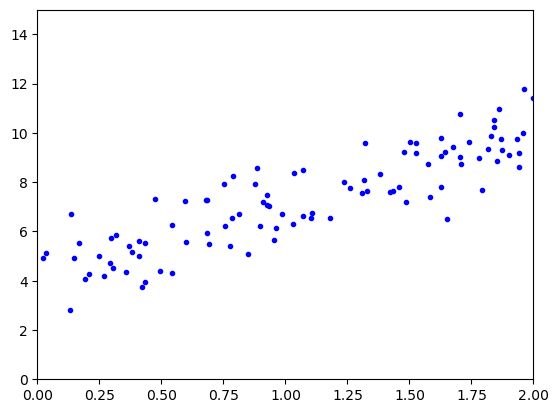

In [2]:
import matplotlib.pyplot as plt

plt.plot(x, y, "b.")
plt.axis([0,2, 0,15])
plt.show()

compute the θ using the normal equation

In [3]:
x_b = np.c_[np.ones((100, 1)), x] # add x0 = 1 to each instance
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [4]:
theta_best

array([[4.19544231],
       [2.89966079]])

make predictions using the found theta

In [5]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new] # add x0 = 1 to each new instance
y_predict = x_new_b.dot(theta_best)
y_predict

array([[4.19544231],
       [9.99476388]])

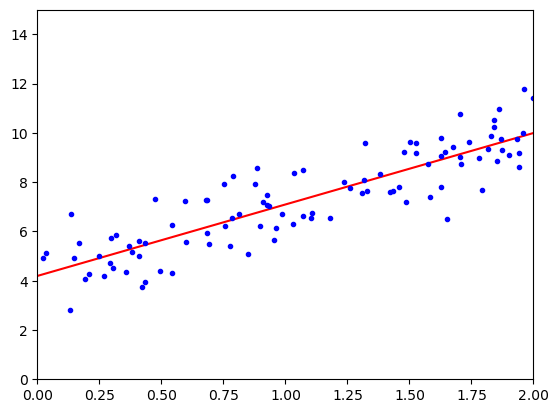

In [6]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Performing Linear Regression with Scikit-lear

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.19544231]), array([[2.89966079]]))

In [8]:
lin_reg.predict(x_new)

array([[4.19544231],
       [9.99476388]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[4.19544231],
       [2.89966079]])

This function computes θ = X+y, where X+ is the pseudoinverse of X (specifically the
Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoin‐
verse directly:

In [10]:
np.linalg.pinv(x_b).dot(y)

array([[4.19544231],
       [2.89966079]])

## Batch Gradient Descent

In [11]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
   gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
   theta = theta - eta * gradients

theta

array([[4.19544231],
       [2.89966079]])

## Stochastic Gradient Descent(Random GD)

In [12]:
n_epochs = 50
t0, t1 = 5, n_epochs # learning schedule hyperparameters

def learning_schedule(t):
   return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
   for i in range(m):
      random_index = np.random.randint(m)
      xi = x_b[random_index:random_index+1]
      yi = y[random_index: random_index+1]
      gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
      eta = learning_schedule(epoch * m + i)
      theta = theta - eta * gradients

In [13]:
theta

array([[4.2060039 ],
       [2.84742948]])

### SGDRegresser

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19330182]), array([2.94106696]))

### Mini-batch Gradient Descent

## Polynomial Regression

generate nonlinear data

In [16]:
m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 * x**2 + x+ 2 + np.random.randn(m, 1)

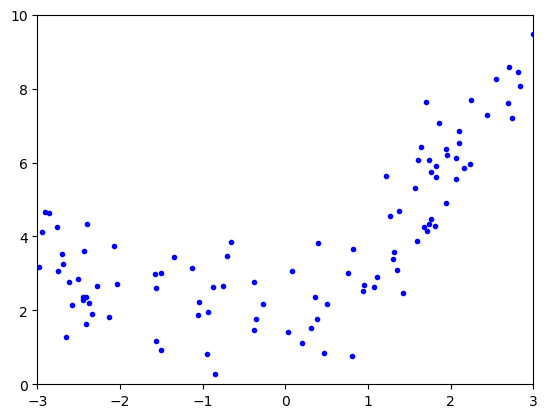

In [17]:
plt.plot(x,y, "b.")
plt.axis([-3,3,0,10])
plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x[0]

array([-1.04407686])

In [19]:
x_poly[0]

array([-1.04407686,  1.09009648])

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.15217907]), array([[0.87513336, 0.48636543]]))

In [21]:
y_predict = lin_reg.predict([x_poly[0], x_poly[3]])

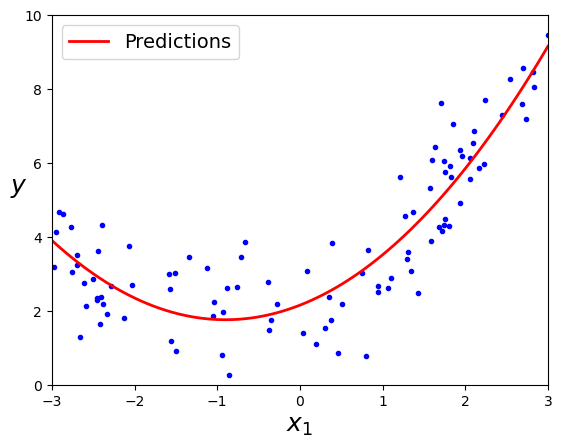

In [22]:
x_new=np.linspace(-3, 3, 100).reshape(100, 1)
x_new_poly = poly_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
plt.plot(x, y, "b.")
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## Learning Curves

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
   x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2)
   train_errors, val_errors = [], []
   for m in range(1, len(x_train)):
      model.fit(x_train[:m], y_train[:m])
      y_train_predict = model.predict(x_train[:m])
      y_val_predict = model.predict(x_val)
      val_errors.append(mean_squared_error(y_val, y_val_predict))
      train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
   plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
   plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
   plt.axis([0,80,0,5])
   plt.legend()
   plt.show()

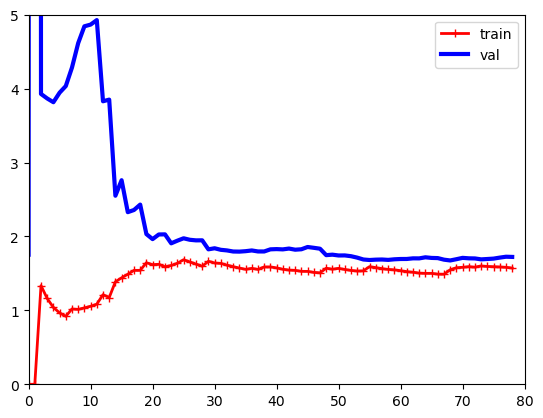

In [24]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

model underfits

## Using 10th degree polynomial model

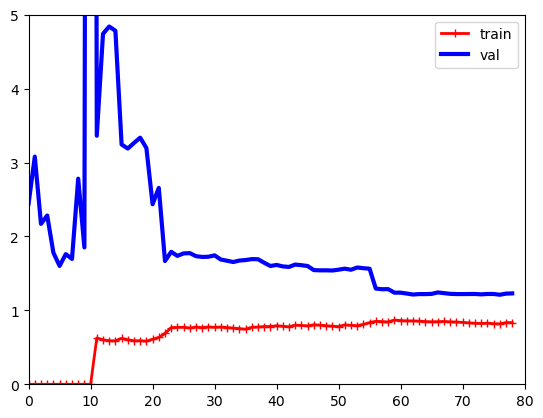

In [25]:
from sklearn.pipeline import Pipeline

polynomial_regression =  Pipeline([
   ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
   ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, x, y)

## Regularizing Linear Models
### Ridge Regression

In [26]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x,y)

Ridge(alpha=1, solver='cholesky')

In [27]:
ridge_reg.predict([[1.5]])

array([[4.93228582]])

In [28]:
sgd_reg = SGDRegressor(penalty="l2")   
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

array([4.90745703])

### Lasso Regression(SGDRegressor(penalty="l1"))

In [29]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([4.89363023])

## Elastic Net